In [20]:
# Import dependencies
%matplotlib inline
import os
import pandas as pd
import csv
import numpy as np
import matplotlib.pyplot as plt

# Get the csv and transform into pandas dataframe
file = "Resources/cleanest_data.csv"

water_df = pd.read_csv(file)

In [21]:
water_df

Unnamed: 0            County  Year  Total Population in Thousands  \
0             0    Alameda County  1985                       1195.160   
1             1    Alameda County  1990                       1279.180   
2             2    Alameda County  1995                       1347.700   
3             3    Alameda County  2000                       1443.740   
4             4    Alameda County  2005                       1448.905   
5             5    Alameda County  2010                       1510.271   
6             6    Alameda County  2015                       1638.215   
7             7     Alpine County  1985                          1.200   
8             8     Alpine County  1990                          1.110   
9             9     Alpine County  1995                          1.170   
10           10     Alpine County  2000                          1.210   
11           11     Alpine County  2005                          1.159   
12           12     Alpine County  2010                          1.175   
13           13     Alpine County  2015                          1.110   
14           14     Amador County  1985                         22.890   
15           15     Amador County  1990                         30.040   
16           16     Amador County  1995                         32.600   
17           17     Amador County  2000                         35.100   
18           18     Amador County  2005                         38.471   
19           19     Amador County  2010                         38.091   
20           20     Amador County  2015                         37.001   
21           21      Butte County  1985                        163.220   
22           22      Butte County  1990                        182.120   
23           23      Butte County  1995                        196.100   
24           24      Butte County  2000                        203.170   
25           25      Butte County  2005                        214.185   
26           26      Butte County  2010                        220.000   
27           27      Butte County  2015                        225.411   
28           28  Calaveras County  1985                         26.880   
29           29  Calaveras County  1990                         32.000   
..          ...               ...   ...                            ...   
376         376     Tulare County  2010                        442.179   
377         377     Tulare County  2015                        459.863   
378         378   Tuolumne County  1985                         40.470   
379         379   Tuolumne County  1990                         48.460   
380         380   Tuolumne County  1995                         51.500   
381         381   Tuolumne County  2000                         54.500   
382         382   Tuolumne County  2005                         59.380   
383         383   Tuolumne County  2010                         55.365   
384         384   Tuolumne County  2015                         53.709   
385         385    Ventura County  1985                        599.770   
386         386    Ventura County  1990                        669.020   
387         387    Ventura County  1995                        712.700   
388         388    Ventura County  2000                        753.200   
389         389    Ventura County  2005                        796.106   
390         390    Ventura County  2010                        823.318   
391         391    Ventura County  2015                        850.536   
392         392       Yolo County  1985                        124.350   
393         393       Yolo County  1990                        141.090   
394         394       Yolo County  1995                        150.800   
395         395       Yolo County  2000                        168.660   
396         396       Yolo County  2005                        184.932   
397         397       Yolo County  2010                        200.849   
398      

In [22]:
# Get column headers
water_df.columns

Index(['Unnamed: 0', 'County', 'Year', 'Total Population in Thousands',
       'Population Served in Thousands',
       'Public Self-Supply Withdrawals (Mgal/ day)',
       'Public Supply Per Capita (Gallons/Person/Day)',
       'Domestic Self-Supply Withdrawn (Mgal/day)',
       'Domestic Self-Supply Population (Thousands)',
       'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d',
       'Domestic, Public-Supply, Gallons/Person/Day',
       'Total Domestic Consumption (Mgal/day)',
       'Domestic, Self-Supply, Gallons/Person/Day',
       'Industrial, Self-Supply Withdrawn (Mgal/day)',
       'Industrial Total Consumption (Mgal/day)',
       'Livestock, Self-Supply, Freshwater (Mgal/day)',
       'Livestock Consumption Freshwater (Mgal/day)',
       'Irrigation, Crop, Self-Supply, Fresh (Mgal/day)',
       'Irrigation Crop Consumtion Freshwater (Mgal)'],
      dtype='object')

In [23]:
# Add all associated agricultural and industrial columns together. Must fill NaN values with 0 or else sums will stay as NaN
water_df["Total Agricultural Use (Mgal/day)"] = water_df.fillna(0)['Livestock, Self-Supply, Freshwater (Mgal/day)'] + water_df.fillna(0)['Livestock Consumption Freshwater (Mgal/day)'] + water_df.fillna(0)['Irrigation, Crop, Self-Supply, Fresh (Mgal/day)'] + water_df.fillna(0)['Irrigation Crop Consumtion Freshwater (Mgal)']
water_df["Total Industrial Use (Mgal/day)"] = water_df.fillna(0)['Industrial, Self-Supply Withdrawn (Mgal/day)'] + water_df.fillna(0)['Industrial Total Consumption (Mgal/day)']

# Turn all remaining 0 values back to NaN in the affected columns
# Choose all columns to leave out when turning 0's back to NaNs
agri = water_df.columns.drop([
    'Unnamed: 0', 
    'County', 
    'Year', 
    'Total Population in Thousands', 
    'Population Served in Thousands',
    'Public Self-Supply Withdrawals (Mgal/ day)',
    'Public Supply Per Capita (Gallons/Person/Day)',
    'Domestic Self-Supply Withdrawn (Mgal/day)',
    'Domestic Self-Supply Population (Thousands)',
    'Domestic, Public-Supply, Gallons/Person/Day',
    'Total Domestic Consumption (Mgal/day)',
    'Domestic, Self-Supply, Gallons/Person/Day'
])

# Replacing 0's to NaNs to columns that weren't dropped
water_df[agri] = water_df[agri].replace(0.00, np.nan)

In [24]:
# Create a total water usage and apply above method to fill 0's and then turn them back to NaNs
water_df["Total Water Usage (Mgal/day)"] = water_df.fillna(0)['Domestic total self-supplied withdrawals plus deliveries, in Mgal/d'] + water_df.fillna(0)['Total Agricultural Use (Mgal/day)'] + water_df.fillna(0)['Total Industrial Use (Mgal/day)']

drop = water_df.columns.drop([
    'Unnamed: 0', 
    'County', 
    'Year', 
    'Total Population in Thousands',
    'Population Served in Thousands',
    'Public Self-Supply Withdrawals (Mgal/ day)',
    'Public Supply Per Capita (Gallons/Person/Day)',
    'Domestic Self-Supply Withdrawn (Mgal/day)',
    'Domestic Self-Supply Population (Thousands)',
    'Domestic, Public-Supply, Gallons/Person/Day',
    'Total Domestic Consumption (Mgal/day)',
    'Domestic, Self-Supply, Gallons/Person/Day',
    'Industrial, Self-Supply Withdrawn (Mgal/day)',
    'Industrial Total Consumption (Mgal/day)',
    'Livestock, Self-Supply, Freshwater (Mgal/day)',
    'Livestock Consumption Freshwater (Mgal/day)',
    'Irrigation, Crop, Self-Supply, Fresh (Mgal/day)',
    'Irrigation Crop Consumtion Freshwater (Mgal)'
])

water_df[drop] = water_df[drop].replace(0.00, np.nan)

# Create new dataframe to keep columns that are needed
water_df = water_df[['County', 'Year', 'Domestic total self-supplied withdrawals plus deliveries, in Mgal/d', 'Total Agricultural Use (Mgal/day)', 'Total Industrial Use (Mgal/day)', 'Total Water Usage (Mgal/day)']]
water_df

County  Year  \
0      Alameda County  1985   
1      Alameda County  1990   
2      Alameda County  1995   
3      Alameda County  2000   
4      Alameda County  2005   
5      Alameda County  2010   
6      Alameda County  2015   
7       Alpine County  1985   
8       Alpine County  1990   
9       Alpine County  1995   
10      Alpine County  2000   
11      Alpine County  2005   
12      Alpine County  2010   
13      Alpine County  2015   
14      Amador County  1985   
15      Amador County  1990   
16      Amador County  1995   
17      Amador County  2000   
18      Amador County  2005   
19      Amador County  2010   
20      Amador County  2015   
21       Butte County  1985   
22       Butte County  1990   
23       Butte County  1995   
24       Butte County  2000   
25       Butte County  2005   
26       Butte County  2010   
27       Butte County  2015   
28   Calaveras County  1985   
29   Calaveras County  1990   
..                ...   ...   
376     Tulare County  2010   
377     Tulare County  2015   
378   Tuolumne County  1985   
379   Tuolumne County  1990   
380   Tuolumne County  1995   
381   Tuolumne County  2000   
382   Tuolumne County  2005   
383   Tuolumne County  2010   
384   Tuolumne County  2015   
385    Ventura County  1985   
386    Ventura County  1990   
387    Ventura County  1995   
388    Ventura County  2000   
389    Ventura County  2005   
390    Ventura County  2010   
391    Ventura County  2015   
392       Yolo County  1985   
393       Yolo County  1990   
394       Yolo County  1995   
395       Yolo County  2000   
396       Yolo County  2005   
397       Yolo County  2010   
398       Yolo County  2015   
399       Yuba County  1985   
400       Yuba County  1990   
401       Yuba County  1995   
402       Yuba County  2000   
403       Yuba County  2005   
404       Yuba County  2010   
405       Yuba County  2015   

     Domestic total self-supplied withdrawals plus deliveries, in Mgal/d  \
0                                               122.16                     
1                                               143.44                     
2                                               143.45                     
3                                                  NaN                     
4                                                76.84                     
5                                               129.02                     
6                                                98.86                     
7                                                 0.12                     
8                                                 0.14                     
9                                                 0.12                     
10                                                 NaN                     
11                                                0.09                     
12                                                0.12                     
13                                                0.10                     
14                                                2.43                     
15                                                2.31                     
16                                                2.76                     
17                                                 NaN                     
18                                                4.94                     
19                                                3.69                     
20                                                3.96                     
21                                               26.36                     
22                                               25.28                     
23                                               33.88                     
24                                                 NaN                     
25                                               45.26                     
26                                      

In [25]:
# Filter out 2010 and 2015 data only
twentyten = water_df.loc[water_df["Year"] == 2010, :]
twentyfifteen = water_df.loc[water_df["Year"] == 2015, :]

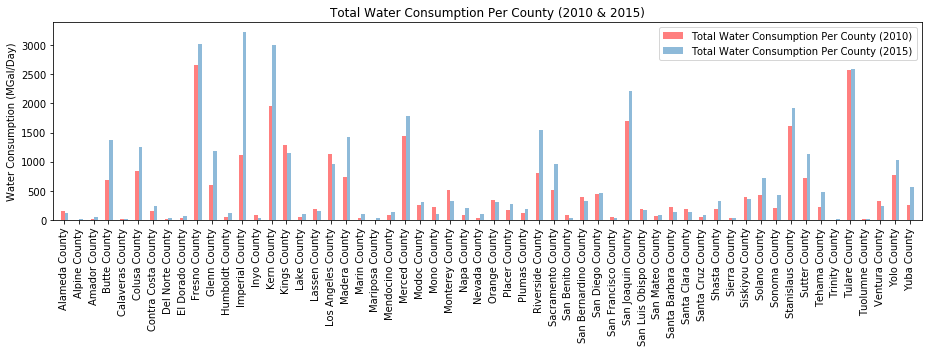

In [26]:
# Create a grouped bar chart for both 2010 and 2015
plt.figure(figsize=(13,5))
barWidth = 0.25

x_axis = np.arange(len(twentyten))
x_axis2 = [x + barWidth for x in x_axis]
tick_locations = [value + 0.2 for value in x_axis]

plt.bar(x_axis, twentyten["Total Water Usage (Mgal/day)"], width=barWidth, alpha=0.5, align="edge", color="r", label="Total Water Consumption Per County (2010)")
plt.bar(x_axis2, twentyfifteen["Total Water Usage (Mgal/day)"], width=barWidth, alpha=0.5, align="edge", label="Total Water Consumption Per County (2015)")

plt.xlim(-0.5, len(x_axis))
plt.xticks(tick_locations, twentyten["County"], rotation="vertical")
plt.title("Total Water Consumption Per County (2010 & 2015)")
plt.ylabel("Water Consumption (MGal/Day)")
plt.legend()

plt.tight_layout()
plt.savefig("Images/waterconsumption2010&2015.png")
plt.show()

In [28]:
# Create a summary table of total water usage by year
totalWater = water_df.groupby(["Year"])["Total Water Usage (Mgal/day)"].sum()
totalRes = water_df.groupby(["Year"])["Domestic total self-supplied withdrawals plus deliveries, in Mgal/d"].sum()
totalAgr = water_df.groupby(["Year"])["Total Agricultural Use (Mgal/day)"].sum()
totalInd = water_df.groupby(["Year"])["Total Industrial Use (Mgal/day)"].sum()

summary = pd.DataFrame({
    "Total Water Usage (Mgal/day)": totalWater,
    "Total Residential Use (Mgal/day)": totalRes,
    "Total Agricultural Use (Mgal/day)": totalAgr,
    "Total Industrial Use (Mgal/day)": totalInd
})
summary

Total Water Usage (Mgal/day)  Total Residential Use (Mgal/day)  \
Year                                                                   
1985                       4384.43                           3378.87   
1990                       4313.76                           4058.13   
1995                       4653.71                           3830.97   
2000                      30958.06                              0.00   
2005                       4761.79                           4469.50   
2010                      27468.75                           4037.56   
2015                      37401.29                           3354.71   

      Total Agricultural Use (Mgal/day)  Total Industrial Use (Mgal/day)  
Year                                                                      
1985                               0.00                          1005.56  
1990                               0.00                           255.63  
1995                               0.00                           822.74  
2000                           30756.15                           201.91  
2005                             196.62                            95.67  
2010                           23031.22                           399.97  
2015                           33648.03                           398.55